In [1]:
import json
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [2]:
dump_paths = [
    "./logs/8wrk_system/varied_beta_time-const1_fees-smin128-80cycle/dump.json",
    "./logs/8wrk_system/varied_beta_time-rand_fees-smin128-80cycle/dump.json",
    "./logs/8wrk_system/vary_beta-t60-smin128-80cycle/dump.json",
    "./logs/8wrk_system/vary_cycles-t_proportion-smin128-beta8/dump.json",
    "./logs/8wrk_system/vary_smin-t60-beta8-80cycle/dump.json",
]

In [3]:
all_data = []
for path in dump_paths:
    with open(path, "r") as f:
        data = json.load(f)
    vals = list(d for d in data.values() if type(d) == dict)
    all_data += vals

In [4]:

bins = list(set((d["MAX_TIME"] for d in all_data)))
bins.sort()

In [5]:
def get_avg_train_time(x):
    ips = {d[0]: sum(d[1]) for d in x["timing_logs"].items()}
    return mean(ips.values())

def get_max_train_time(x):
    ips = {d[0]: sum(d[1]) for d in x["timing_logs"].items()}
    return max(ips.values())

In [6]:
experiments_binned = {b: [x for x in all_data if x["MAX_TIME"] == b] for b in bins}
experiments_binned

{60: [{'BATCH_SIZE': 32,
   'NUM_GLOBAL_CYCLES': 80,
   'NUM_BENCHMARK': 1000,
   'BETA': 2,
   'S_MIN': 128,
   'MAX_TIME': 60,
   'max_time_per_cycle': 0.75,
   'FEE_TYPE': 'constant',
   'WEIGHT_TYPE': 'xavier',
   'benchmark_scores': {'192.168.2.217': 561.7809818373327,
    '192.168.2.109': 608.0768910705002,
    '192.168.2.251': 456.27308260076387,
    '192.168.2.128': 1366.4885321347506,
    '192.168.2.249': 401.9777327760617,
    '192.168.2.16': 492.4512137032876,
    '192.168.2.36': 666.681713867723,
    '192.168.2.137': 504.3883658039373},
   'total_batches': 1875,
   'workers': [{'s_max': 421,
     'c': 1.0,
     'id': '192.168.2.217',
     'num_assigned': 421,
     'cost': 421.0},
    {'s_max': 456,
     'c': 1.0,
     'id': '192.168.2.109',
     'num_assigned': 456,
     'cost': 456.0},
    {'s_max': 342,
     'c': 1.0,
     'id': '192.168.2.251',
     'num_assigned': 342,
     'cost': 342.0},
    {'s_max': 1024,
     'c': 1.0,
     'id': '192.168.2.128',
     'num_assigned

In [7]:

avg_times_dict = {b[0]: [get_avg_train_time(x) / b[0] for x in b[1] ] for b in experiments_binned.items()}
max_times_dict = {b[0]: [get_max_train_time(x) / b[0] for x in b[1] ] for b in experiments_binned.items()}
avg_list = [mean(avg_times_dict[b]) for b in bins]
max_list = [mean(max_times_dict[b]) for b in bins]


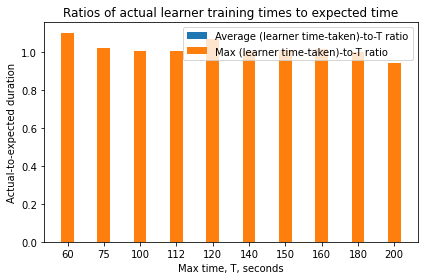

In [10]:
labels = [str(x) for x in bins]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(labels, avg_list, width, label='Average (learner time-taken)-to-T ratio')
rects2 = ax.bar(labels, max_list, width, label='Max (learner time-taken)-to-T ratio')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Actual-to-expected duration')
ax.set_xlabel("Max time, T, seconds")
ax.set_title('Ratios of actual learner training times to expected time')
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()